Next step is regression. This task is kind of different compared to the straightforward classification tasks since you may need to spend some efforts in preprocessing data and feature engineering. In this notebook, there will be step-by-step code blocks for them. The idea of this notebook comes from [TensorFlow Tutorial](https://www.tensorflow.org/tutorials/keras/basic_regression#inspect_the_data). Let's get started!

The dataset used for this problem comes from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). And the details of the data will be inspected before model construction.

In [1]:
# Import libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as layers

In [2]:
# Download dataset and load using pandas data frame.
downloaded_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
print('The dataset is downloaded at: ', downloaded_path)

catagories = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']  # names of columns
dataset = pd.read_csv(downloaded_path, names = catagories, na_values = "?", comment='\t', sep=" ", skipinitialspace=True).copy()
dataset.head()  # show the top part of the data frame

The dataset is downloaded at:  C:\Users\rambo\AppData\Roaming\SPB_Data\.keras\datasets\auto-mpg.data


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [3]:
# Check the number of missing values.
dataset.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

Good news! There is only 6 missing values in Horsepower and to simplify the imputation, we can just drop these values. In general, if there are missing values, common methods include dropping them(if only a small amount), replacing with median/mean/mode, etc.

In [4]:
dataset = dataset.dropna()

Now look further into the dataset, there is only one catagorical feature, which is "Origin", and we use one-hot encoding to preprocess it.

In [5]:
# Get dummy variables for "Origin".
dataset = pd.get_dummies(dataset, columns=['Origin'])
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_1,Origin_2,Origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


In [6]:
# Construct training and test sets.
train_data = dataset.sample(frac=0.75,random_state=0)
test_data = dataset.drop(train_data.index)

<Figure size 432x288 with 0 Axes>

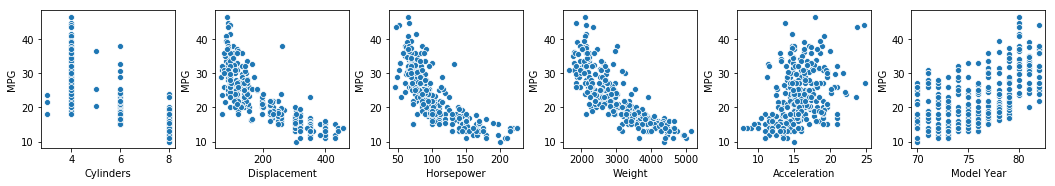

In [7]:
# Scatter plots for each feature and target value.
features = ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year']
plt.clf()
f, axs = plt.subplots(1 ,6, figsize=(18,2.53))
for i in range(len(features)):
    sns.scatterplot(x=features[i], y='MPG', data=train_data, ax=axs[i])
plt.subplots_adjust(wspace=0.3)
plt.show()

In [8]:
# Extract labels of "MPG".
train_label = train_data.pop('MPG')
test_label = test_data.pop('MPG')

In [9]:
# Training data summary.
train_stats = train_data.describe().transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,294.0,5.489796,1.706712,3.0,4.000,4.0,8.000,8.0
Displacement,294.0,195.455782,103.491849,68.0,105.000,151.0,293.250,455.0
Horsepower,294.0,104.602041,37.561619,46.0,76.000,95.0,129.000,225.0
Weight,294.0,2993.295918,843.076074,1649.0,2256.500,2831.5,3612.000,5140.0
Acceleration,294.0,15.594218,2.776609,8.0,13.925,15.5,17.275,24.8
Model Year,294.0,75.874150,3.706071,70.0,73.000,76.0,79.000,82.0
Origin_1,294.0,0.632653,0.482904,0.0,0.000,1.0,1.000,1.0
Origin_2,294.0,0.173469,0.379298,0.0,0.000,0.0,0.000,1.0
Origin_3,294.0,0.193878,0.396008,0.0,0.000,0.0,0.000,1.0


In [10]:
# Normalize dataset. Notice that the normalization is also applied to the one-hot encoded features.
def normalize(data):
    return (data - train_stats['mean']) / train_stats['std']

train_data = normalize(train_data)
test_data = normalize(test_data)

In [11]:
# Model construction.
model = keras.Sequential()
model.add(layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_data.keys())]))
model.add(layers.Dense(64, activation=tf.nn.relu))
model.add(layers.Dense(1))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Model compiling.
model.compile(optimizer=keras.optimizers.RMSprop(0.001),
              loss='mean_squared_error',
              metrics=['mean_absolute_error', 'mean_squared_error'])

Instructions for updating:
Use tf.cast instead.


In [13]:
# Model training.
history = model.fit(train_data,
                    train_label,
                    epochs=1000,
                    validation_split=0.25,
                    verbose=0)

Instructions for updating:
Use tf.cast instead.


In [14]:
# Display training history. The row indices correspond to epoch.
history_disp = pd.DataFrame(history.history)
history_disp.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error
995,1.745584,0.834964,1.745584,12.610334,2.660346,12.610334
996,1.842869,0.881008,1.842869,12.727980,2.723200,12.727980
997,1.675071,0.819683,1.675071,12.592592,2.661388,12.592592
998,1.744353,0.840786,1.744353,11.923135,2.615121,11.923136
999,1.608597,0.752071,1.608597,12.190316,2.639476,12.190315


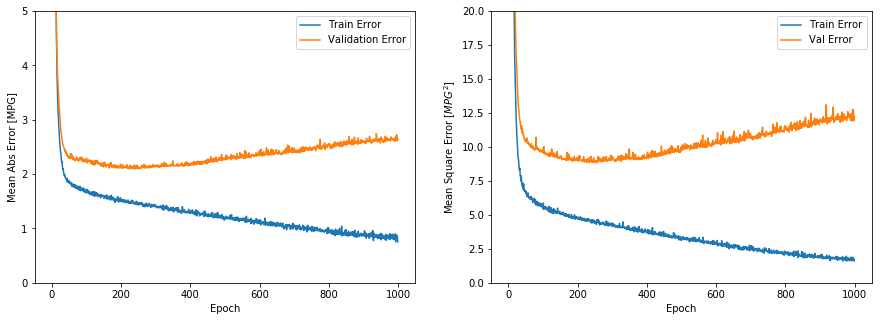

In [15]:
# Plot training history improved.
f, axs = plt.subplots(1, 2, figsize=(15,5))
plt.subplot(121)
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [MPG]')
plt.plot(history.epoch, history_disp['mean_absolute_error'], label='Train Error')
plt.plot(history.epoch, history_disp['val_mean_absolute_error'], label = 'Validation Error')
plt.ylim([0,5])
plt.legend()

plt.subplot(122)
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error [$MPG^2$]')
plt.plot(history.epoch, history_disp['mean_squared_error'], label='Train Error')
plt.plot(history.epoch, history_disp['val_mean_squared_error'], label = 'Val Error')
plt.ylim([0,20])
plt.legend()
plt.show()

From the training curves it is obvious the model overfits, so we want to have an early stop at around 100 epoch.

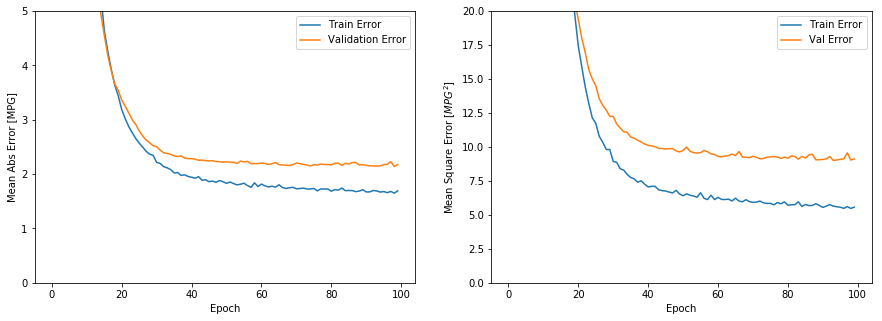

In [16]:
# Redo the improved model construction and training.
model = keras.Sequential()
model.add(layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_data.keys())]))
model.add(layers.Dense(64, activation=tf.nn.relu))
model.add(layers.Dense(1))

model.compile(optimizer=keras.optimizers.RMSprop(0.001),
              loss='mean_squared_error',
              metrics=['mean_absolute_error', 'mean_squared_error'])

history = model.fit(train_data,
                    train_label,
                    epochs=100,
                    validation_split=0.25,
                    verbose=0)

history_disp = pd.DataFrame(history.history)

f, axs = plt.subplots(1, 2, figsize=(15,5))
plt.subplot(121)
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [MPG]')
plt.plot(history.epoch, history_disp['mean_absolute_error'], label='Train Error')
plt.plot(history.epoch, history_disp['val_mean_absolute_error'], label = 'Validation Error')
plt.ylim([0,5])
plt.legend()

plt.subplot(122)
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error [$MPG^2$]')
plt.plot(history.epoch, history_disp['mean_squared_error'], label='Train Error')
plt.plot(history.epoch, history_disp['val_mean_squared_error'], label = 'Val Error')
plt.ylim([0,20])
plt.legend()
plt.show()

In [17]:
# Evaluate model.
loss, mean_absolute_error, mean_squared_error = model.evaluate(test_data, test_label)

98/98 [==============================] - 0s 41us/sample - loss: 6.2022 - mean_absolute_error: 1.8895 - mean_squared_error: 6.2022


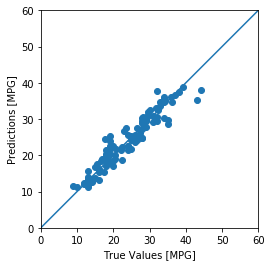

In [18]:
# Visualize the performance of the predictions.
test_predictions = model.predict(test_data).flatten()

plt.scatter(test_label, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0, 60])
plt.ylim([0, 60])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()

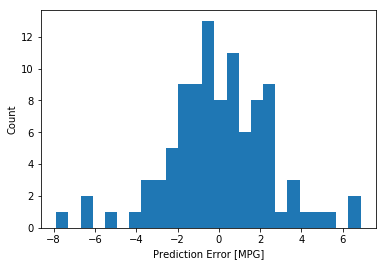

In [19]:
# Visualize the error distribution.
errors = test_predictions - test_label
plt.hist(errors, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")
plt.show()